In [17]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
%matplotlib inline

In [ ]:
# De realizat:
# 1. Definiti o serie pandas.
# 2. Definiti un dataframe in pandas.
# 3. Cum veti afisa numai filmele de la DC pentru DataFrame-ul new_csv?
# 4. Cum veti afisa numai anul si titlu pentru filmele de la  Marvel?
# 5. Desenati graficul pentru PretulMediuLaBilet cu Anul pe axa y. Culoarea liniei sa fie neagra.


In [18]:
new_csv = pd.read_csv("imbd_superhero.csv", 
                      header = None,
                      names=['An', 'Titlu','Organizatia', 'IMDB', 'AltRating', 'DataX', 'UnknownColumn', 'PretMediulaBilet', 'NrDeSpectatori', 'TopPentruAncutare']
                     )

altrating_norm = np.where(new_csv['IMDB']>=7, 'yes', 'no')
new_csv.insert(10, 'StatusPrivit',altrating_norm)
new_csv.head(10)

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnknownColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare,StatusPrivit
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3.190318e+06,222584545,yes
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5.241830e+06,227224681,no
2,1982,Swamp Thing,DC,5.3,60,56.5,NaN,2.94,NaN,231664458,no
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4.238843e+06,233791994,no
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1.707812e+06,235824902,no
5,1986,Howard the Duck,Marvel,4.3,16,29.5,5070136.0,3.71,1.366613e+06,240132887,no
6,1987,Superman IV: The Quest for Peace,DC,3.6,10,23.0,5683122.0,3.91,1.453484e+06,242288918,no
7,1989,Batman,DC,7.6,71,73.5,40489746.0,3.97,1.019893e+07,246819230,yes
8,1989,The Return of Swamp Thing,DC,3.9,40,39.5,NaN,3.97,NaN,246819230,no
9,1989,The Punisher,Marvel,5.4,24,39.0,NaN,3.97,NaN,246819230,no


In [19]:
dc = new_csv[new_csv['Organizatia']=='DC']
dc.head(8)

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnknownColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare,StatusPrivit
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3.190318e+06,222584545,yes
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5.241830e+06,227224681,no
2,1982,Swamp Thing,DC,5.3,60,56.5,NaN,2.94,NaN,231664458,no
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4.238843e+06,233791994,no
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1.707812e+06,235824902,no
6,1987,Superman IV: The Quest for Peace,DC,3.6,10,23.0,5683122.0,3.91,1.453484e+06,242288918,no
7,1989,Batman,DC,7.6,71,73.5,40489746.0,3.97,1.019893e+07,246819230,yes
8,1989,The Return of Swamp Thing,DC,3.9,40,39.5,NaN,3.97,NaN,246819230,no


In [22]:
marvel = new_csv[new_csv['Organizatia']=='Marvel']
marvel=pd.DataFrame(marvel)
marvel=marvel[['An', 'Titlu']]
marvel

,An,Titlu
5,1986,Howard the Duck
9,1989,The Punisher
14,1998,Blade
15,2000,X-Men
16,2002,Blade II
17,2002,Spider-Man
18,2003,Daredevil
19,2003,Hulk
20,2003,X2
21,2004,Blade: Trinity


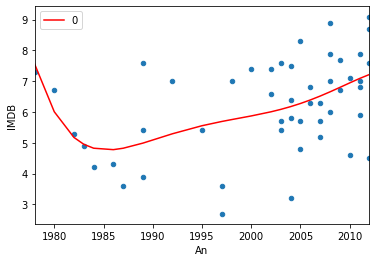

In [25]:
new_csv = pd.read_csv("imbd_superhero.csv", 
                      header = None,
                      names=['An', 'Titlu','Organizatia', 'IMDB', 'AltRating', 'DataX', 'UnknownColumn', 'PretMediulaBilet', 'NrDeSpectatori', 'TopPentruAncutare']
                     )

plot = new_csv.plot.scatter(x='An', y='IMDB')
z = np.polyfit(x=new_csv.An, y=new_csv.IMDB, deg=5)
p = np.poly1d(z)
trendline = pd.DataFrame(data=p(new_csv.An), index=new_csv.An)
trendline.plot.line(ax=plot, color='Red')